In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [101]:
# Load the dataset
df = pd.read_csv('TASK.csv')

In [103]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [105]:
# Data Exploration
print("Dataset Info:")
df.info()
print("\nFirst Few Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB

First Few Rows:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.

In [107]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


In [109]:
# Identify outliers using Z-score method
z_scores = np.abs((df.iloc[:, 1:-1] - df.iloc[:, 1:-1].mean()) / df.iloc[:, 1:-1].std())
outliers = (z_scores > 3).sum()
print("\nOutliers Per Feature:")
print(outliers[outliers > 0])


Outliers Per Feature:
1      1
2      1
3      1
6      1
8      1
      ..
443    6
444    9
445    7
446    4
447    5
Length: 435, dtype: int64


In [111]:
# Extract spectral data and target variable
spectral_data = df.iloc[:, 1:-1]
target_variable = df["vomitoxin_ppb"]

In [113]:
# Normalize spectral data
scaler = MinMaxScaler()
normalized_spectral_data = pd.DataFrame(scaler.fit_transform(spectral_data), columns=spectral_data.columns)

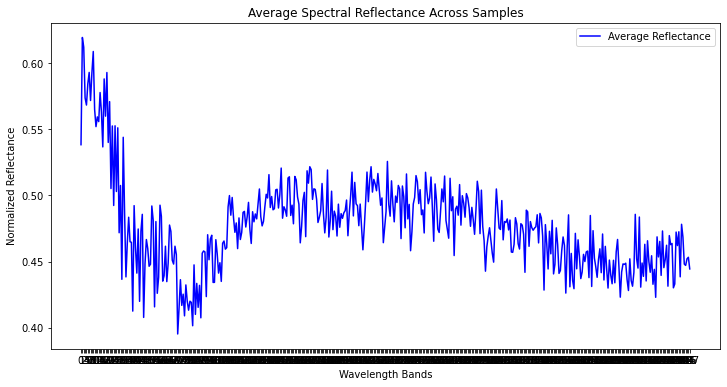

In [115]:
# Plot average spectral reflectance
plt.figure(figsize=(12, 6))
plt.plot(normalized_spectral_data.mean(axis=0), color='b', label='Average Reflectance')
plt.xlabel("Wavelength Bands")
plt.ylabel("Normalized Reflectance")
plt.title("Average Spectral Reflectance Across Samples")
plt.legend()
plt.show()

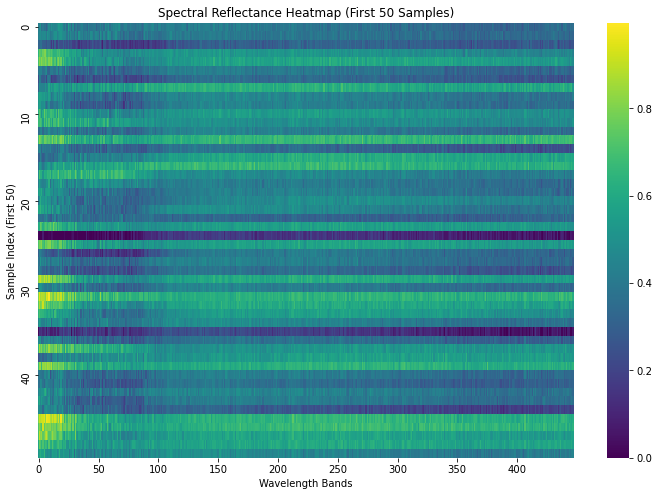

In [117]:
# Heatmap for first 50 samples
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_spectral_data.iloc[:50, :], cmap="viridis", xticklabels=50, yticklabels=10)
plt.xlabel("Wavelength Bands")
plt.ylabel("Sample Index (First 50)")
plt.title("Spectral Reflectance Heatmap (First 50 Samples)")
plt.show()

In [119]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_spectral_data)
print("Explained Variance by Top 2 Components:", pca.explained_variance_ratio_)

Explained Variance by Top 2 Components: [0.8582386  0.06683037]


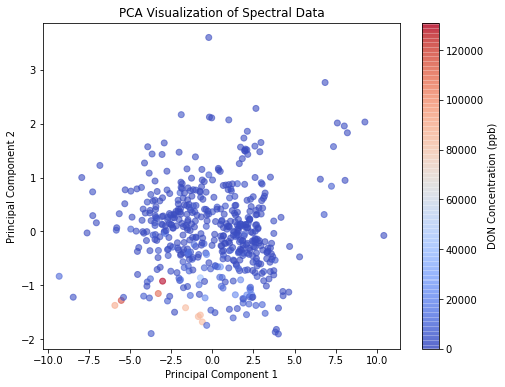

In [121]:
# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target_variable, cmap='coolwarm', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Spectral Data")
plt.colorbar(label="DON Concentration (ppb)")
plt.show()

In [123]:
# Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(normalized_spectral_data)

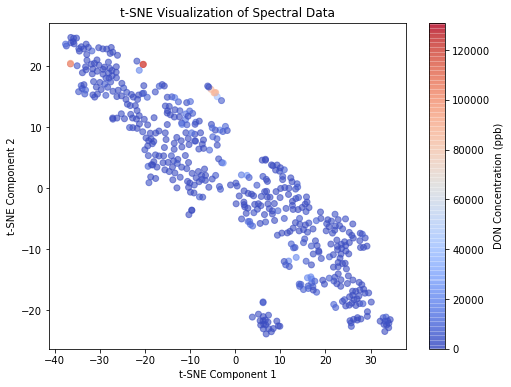

In [124]:
# Scatter plot of t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=target_variable, cmap='coolwarm', alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Spectral Data")
plt.colorbar(label="DON Concentration (ppb)")
plt.show()

In [125]:
## Model Training
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_spectral_data, target_variable, test_size=0.2, random_state=42)

In [131]:
# Define Random Forest model
model = RandomForestRegressor(random_state=42)

In [133]:
# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [135]:
# Perform Randomized Search for best parameters
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [137]:
# Get the best model
best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


In [139]:
# Train the best model
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, random_state=42)

In [141]:
# Predict on test data
y_pred = best_model.predict(X_test)

In [149]:
## Model Evaluation
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [151]:
# Print evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 3883.5302394339797
Root Mean Squared Error (RMSE): 11550.493801668532
R² Score: 0.5227259281358085


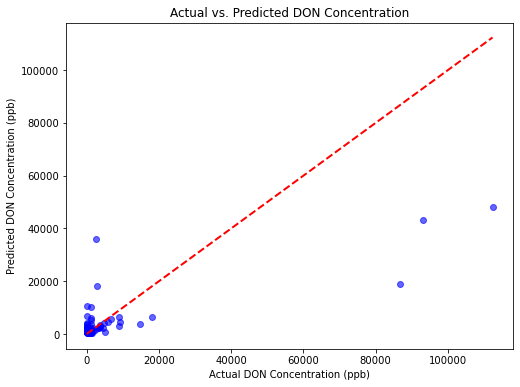

In [153]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel("Actual DON Concentration (ppb)")
plt.ylabel("Predicted DON Concentration (ppb)")
plt.title("Actual vs. Predicted DON Concentration")
plt.show()